In [30]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import keras

from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential
from keras.utils import np_utils
from keras import regularizers

In [2]:
ds = pd.read_csv('../train.csv')
data = ds.values[:5000]

print data.shape

(5000, 785)


In [3]:
X = data[:, 1:]/255.0
y = np_utils.to_categorical(data[:, 0])

print X.shape, y.shape

(5000, 784) (5000, 10)


In [4]:
split = int(0.8 * X.shape[0])

X_train = X[:split]
X_test = X[split:]

y_train = y[:split]
y_test = y[split:]

print X_train.shape, X_test.shape
print y_train.shape, y_test.shape

(4000, 784) (1000, 784)
(4000, 10) (1000, 10)


In [31]:
model = Sequential()
act = 'relu'

model.add(Dense(430, input_shape=(784,)))
model.add(Activation(act))
# model.add(Dropout(0.42))

model.add(Dense(256))
model.add(Activation(act))

model.add(Dense(148))
model.add(Activation(act))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 430)               337550    
_________________________________________________________________
activation_37 (Activation)   (None, 430)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 430)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 256)               110336    
_________________________________________________________________
activation_38 (Activation)   (None, 256)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 148)               38036     
_________________________________________________________________
activation_39 (Activation)   (None, 148)               0         
__________

In [32]:
hist = model.fit(X_train, y_train,
                epochs=20,
                shuffle=True,
                batch_size=100,
                validation_data=(X_test, y_test), verbose=2)

Train on 4000 samples, validate on 1000 samples
Epoch 1/20
0s - loss: 1.0738 - acc: 0.6687 - val_loss: 0.4230 - val_acc: 0.8600
Epoch 2/20
0s - loss: 0.4055 - acc: 0.8763 - val_loss: 0.2967 - val_acc: 0.9080
Epoch 3/20
0s - loss: 0.2649 - acc: 0.9175 - val_loss: 0.2443 - val_acc: 0.9190
Epoch 4/20
0s - loss: 0.2017 - acc: 0.9415 - val_loss: 0.2097 - val_acc: 0.9340
Epoch 5/20
0s - loss: 0.1626 - acc: 0.9528 - val_loss: 0.2195 - val_acc: 0.9330
Epoch 6/20
0s - loss: 0.1382 - acc: 0.9580 - val_loss: 0.2042 - val_acc: 0.9390
Epoch 7/20
0s - loss: 0.1034 - acc: 0.9692 - val_loss: 0.1857 - val_acc: 0.9390
Epoch 8/20
0s - loss: 0.0774 - acc: 0.9787 - val_loss: 0.1825 - val_acc: 0.9410
Epoch 9/20
0s - loss: 0.0633 - acc: 0.9795 - val_loss: 0.1791 - val_acc: 0.9510
Epoch 10/20
0s - loss: 0.0572 - acc: 0.9842 - val_loss: 0.2218 - val_acc: 0.9420
Epoch 11/20
0s - loss: 0.0526 - acc: 0.9835 - val_loss: 0.1866 - val_acc: 0.9390
Epoch 12/20
0s - loss: 0.0483 - acc: 0.9842 - val_loss: 0.1961 - val_a

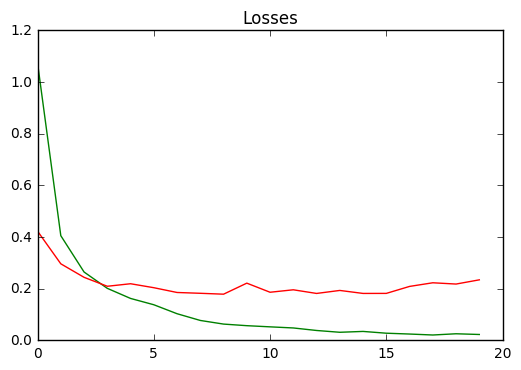

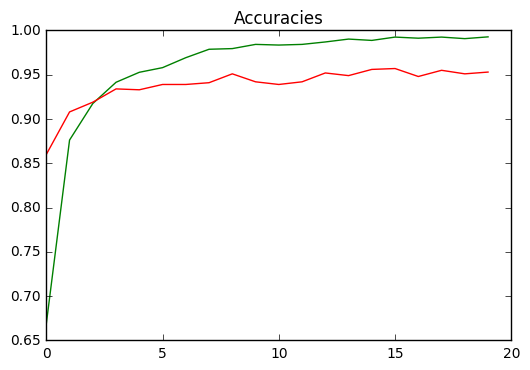

In [33]:
h_data = hist.history

plt.figure(0)
plt.title('Losses')
plt.plot(h_data['loss'], 'green')
plt.plot(h_data['val_loss'], 'red')

plt.figure(1)
plt.title('Accuracies')
plt.plot(h_data['acc'], 'green')
plt.plot(h_data['val_acc'], 'red')

plt.show()